# Open-Source LLM Benchmarks part 1 - Top Evaluation Metrics

## Made by: Wilfredo Aaron Sosa Ramos

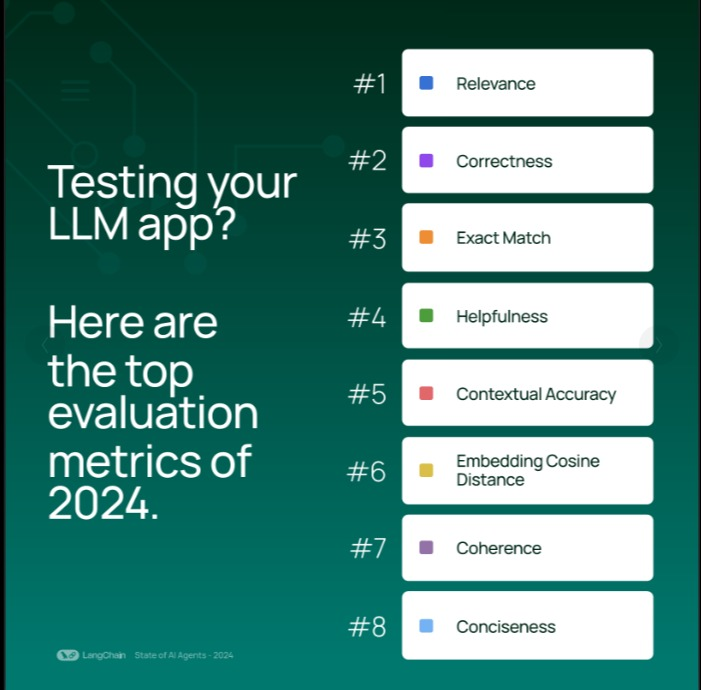

In [1]:
!pip install aisuite 'aisuite[all]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.5 MB/s eta 0:00:00


In [2]:
!pip install -q langchain langchain-core langchain-community langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.5/411.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00


In [47]:
!pip install -q rich

In [48]:
from rich.console import Console
from rich.markdown import Markdown

console = Console()

def print_md(result):
  markdown = Markdown(result)
  console.print(markdown)

In [4]:
import os
from google.colab import userdata

os.environ["HUGGINGFACE_TOKEN"] = userdata.get("HF_TOKEN")
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

In [5]:
import aisuite as ai

client = ai.Client()

In [51]:
from langchain_google_genai import ChatGoogleGenerativeAI
from concurrent.futures import ThreadPoolExecutor, as_completed

# Configure the LLM as a judge
llm_as_a_judge = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0)

# Function to evaluate a single question-answer pair using the messages format
def evaluate_pair_messages(question, answer):
    messages = [
        (
            "system",
            "You are a Large Language Model acting as a judge. Evaluate the following metrics "
            "for a given question and its corresponding answer: Relevance, Correctness, "
            "Exact Match, Helpfulness, Contextual Accuracy, Embedding Cosine Distance, "
            "Coherence, and Conciseness. Provide detailed feedback for each metric."
        ),
        ("human", f"Question: {question}\nAnswer: {answer}"),
    ]
    try:
        evaluation = llm_as_a_judge.invoke(messages)
        return {"question": question, "answer": answer, "evaluation": evaluation}
    except Exception as e:
        print(str(e))
        return {"question": question, "answer": answer, "error": str(e)}

# Function to evaluate multiple question-answer pairs in parallel using messages format
def evaluate_pairs_in_parallel_messages(pairs):
    results = []
    with ThreadPoolExecutor() as executor:
        # Submit tasks for each pair
        future_to_pair = {executor.submit(evaluate_pair_messages, q, a): (q, a) for q, a in pairs}
        for future in as_completed(future_to_pair):
            try:
                results.append(future.result())
            except Exception as e:
                results.append({"error": str(e)})
    return results

# Example usage
if __name__ == "__main__":
    # List of question-answer pairs to evaluate
    pairs = [
        ("What is the capital of France?", "Paris"),
        ("What is 2 + 2?", "4"),
        ("Explain quantum physics in simple terms.", "It's the study of very small particles and how they behave."),
    ]

    # Evaluate pairs in parallel
    feedback = evaluate_pairs_in_parallel_messages(pairs)

    # Print feedback for each pair
    for item in feedback:
        if "evaluation" in item:
            print(f"=================ELEMENT=================")
            print(f"Question: {item['question']}\nAnswer: {item['answer']}\n")
            print_md(item['evaluation'].content)
        else:
            print(f"Error evaluating pair: {item}")

=================ELEMENT=================
Question: What is the capital of France?
Answer: Paris



Let's evaluate the answer "Paris" to the question "What is the capital of France?" across the specified metrics:   

1. Relevance:  The answer is perfectly relevant.  The question asks for the capital of France, and "Paris" directly
addresses that.  Score: 10/10                                                                                      

2. Correctness: The answer is factually correct. Paris is indeed the capital of France. Score: 10/10               

3. Exact Match:  While there isn't a complex or nuanced answer here, the answer is an exact match to the expected  
answer.  Score: 10/10                                                                                              

4. Helpfulness: The answer is extremely helpful. It concisely and accurately provides the information requested.   
Score: 10/10                                                                                                       

5. Contextual Accuracy: The answer is perfectly contextually accurate. There's no ambiguity or need for additional 
context. Score: 10/10                                                                                              

6. Embedding Cosine Distance:  This metric requires comparing the answer's embedding vector to the embedding vector
of an ideal answer.  Since "Paris" is the ideal answer, the cosine distance would be 0 (or extremely close to 0,   
depending on the embedding model's precision).  Score: 10/10 (assuming perfect embedding)                          

7. Coherence: The answer is perfectly coherent. It's a single, unambiguous word that directly answers the question.
Score: 10/10                                                                                                       

8. Conciseness: The answer is exceptionally concise.  It provides the necessary information without any unnecessary
words or explanations. Score: 10/10                                                                                

Overall: The answer "Paris" is a perfect response to the question "What is the capital of France?".  All metrics   
score 10/10.  There's no room for improvement in this simple, straightforward example.

=================ELEMENT=================
Question: What is 2 + 2?
Answer: 4



Let's evaluate the answer "4" to the question "What is 2 + 2?" across the specified metrics:                       

 • Relevance:  The answer is perfectly relevant to the question.  The question asks for a simple arithmetic        
   calculation, and the answer directly provides the result of that calculation.  Score: 10/10                     
 • Correctness: The answer is factually correct. 2 + 2 does indeed equal 4. Score: 10/10                           
 • Exact Match:  While there's no complex phrasing to compare, the answer is an exact numerical match to the       
   correct solution. Score: 10/10                                                                                  
 • Helpfulness: The answer is extremely helpful. It concisely and accurately provides the information requested.   
   Score: 10/10                                                                                                    
 • Contextual Accuracy: The answer is perfectly accurate within the context of the question. There are no          
   ambiguities or misleading information. Score: 10/10                                                             
 • Embedding Cosine Distance:  This metric requires comparing the question and answer embeddings using a vector    
   similarity model (like Sentence-BERT).  Since both are very short and simple, the cosine distance would be very 
   low, indicating high semantic similarity.  Without access to a specific embedding model, I can't provide a      
   numerical score, but conceptually, the score would be very close to 1 (indicating high similarity). Score:      
   (Conceptual) Near 1.0                                                                                           
 • Coherence: The answer is coherent; it's a single, unambiguous numerical response directly answering the         
   question. Score: 10/10                                                                                          
 • Conciseness: The answer is perfectly concise.  It provides the necessary information without any unnecessary    
   words or explanations. Score: 10/10                                                                             

Overall: The answer "4" is an excellent response to the question "What is 2 + 2?".  It scores perfectly or         
near-perfectly across all metrics.

=================ELEMENT=================
Question: Explain quantum physics in simple terms.
Answer: It's the study of very small particles and how they behave.



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  The answer is relevant to the question.  It directly addresses the topic of quantum physics.        
However, the relevance is very superficial.                                                                        

Feedback: The answer touches upon the subject but lacks depth.  While relevant, it's only minimally so.  Score: 2/5

2. Correctness: The statement is technically correct. Quantum physics does deal with the behavior of very small    
particles. However, it's an extreme oversimplification.  It fails to capture the core concepts and complexities of 
the field.                                                                                                         

Feedback: The answer is factually correct but incredibly incomplete.  It's like saying biology is the study of     
living things. While true, it's not informative. Score: 1/5                                                        

3. Exact Match: There's no exact match to expect here. The question is open-ended and seeks an explanation, not a  
specific factual answer.  This metric is not applicable.                                                           

Feedback: Not applicable. Score: N/A                                                                               

4. Helpfulness: The answer is not very helpful.  Someone seeking an explanation of quantum physics would gain very 
little understanding from this response. It's too simplistic to be of any real use.                                

Feedback: The answer provides almost no helpful information.  It's essentially a tautology. Score: 1/5             

5. Contextual Accuracy: The answer is contextually accurate in the sense that it doesn't contradict any known facts
about quantum physics. However, it lacks the necessary context to be meaningful.                                   

Feedback: While not factually inaccurate, the answer lacks the context needed to provide a useful explanation.     
It's accurate but trivial. Score: 2/5                                                                              

6. Embedding Cosine Distance: This metric requires comparing the answer's embedding vector to the question's       
embedding vector.  Without access to an embedding model, I cannot calculate this.  However, I can infer that the   
cosine similarity would be relatively high because the answer uses keywords from the question ("quantum physics"). 
But this high similarity doesn't equate to a good answer.                                                          

Feedback:  Inferentially, the cosine similarity would likely be high due to keyword overlap, but this is misleading
as it doesn't reflect the poor quality of the explanation.  Score: N/A (requires embedding model)                  

7. Coherence: The answer is coherent; it's a single, grammatically correct sentence.  However, it lacks the        
coherence needed to explain a complex topic.                                                                       

Feedback: The answer is internally coherent but lacks the broader coherence needed to provide a useful explanation 
of quantum physics. Score: 3/5                                                                                     

8. Conciseness: The answer is extremely concise.  However, this conciseness comes at the cost of completeness and  
understanding.                                                                                                     

Feedback: While concise, the brevity sacrifices crucial information.  More detail is needed, even if it means      
sacrificing some conciseness. Score: 2/5                                                                           

Overall: The answer is a very poor attempt at explaining quantum physics. While technically correct in a minimal   
sense, it fails to provide any real und

In [54]:
import time

llms = [
        "huggingface:mistralai/Mistral-7B-Instruct-v0.3",
        "huggingface:google/gemma-2-9b-it",
        "huggingface:meta-llama/Llama-3.2-3B-Instruct",
        "huggingface:Qwen/QwQ-32B-Preview",
        "huggingface:mistralai/Mistral-Nemo-Instruct-2407",
        "huggingface:microsoft/Phi-3.5-mini-instruct"
       ]

results_from_llms = []

def compare_llm(messages):
    execution_times = []
    responses = []
    for llm in llms:
        start_time = time.time()
        response = client.chat.completions.create(model=llm, messages=messages)
        end_time = time.time()
        execution_time = end_time - start_time
        responses.append(response.choices[0].message.content.strip())
        execution_times.append(execution_time)
        print(f"=================={llm}===================")
        print(f"{execution_time:.2f} seconds: {response.choices[0].message.content.strip()}")
        value_for_response = (messages[0]['content'], response.choices[0].message.content.strip())
        results_from_llms.append(value_for_response)

    return responses, execution_times

In [55]:
messages = [
    {"role": "user", "content": "What is a LLM?"},
]
responses, execution_times = compare_llm(messages)
feedback = evaluate_pairs_in_parallel_messages(results_from_llms)

for item, llm in zip(feedback, llms):
    print(f"================= {llm} =================")
    if "evaluation" in item:
        print(f"Question: {item['question']}\nAnswer: {item['answer']}\n")
        print_md(item['evaluation'].content)
    else:
        print(f"Error evaluating pair: {item}")

==================huggingface:mistralai/Mistral-7B-Instruct-v0.3===================
0.41 seconds: An LLM, or Master of Laws, is a postgraduate academic degree, pursued by those either holding an undergraduate academic law degree, a professional law degree, or an undergraduate degree in a related subject. It is generally a specialized degree that allows students to focus on a specific area of law, such as international law, human rights law, tax law, or intellectual property law.

An LLM degree is most typically pursued by foreign-trained lawyers who wish to practice
==================huggingface:google/gemma-2-9b-it===================
0.37 seconds: LLM stands for **Large Language Model**.

It's a type of artificial intelligence (AI) that excels at understanding and generating human language.  

Here's a breakdown:

* **Large:** LLMs are trained on massive datasets of text and code, containing billions or even trillions of words. This vast amount of data allows them to learn complex lan

Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  High. The answer directly addresses the question "What is an LLM?" by defining it and explaining its
core functionality.  It stays on topic and doesn't introduce irrelevant information.                               

2. Correctness: High. The definition and explanation of LLMs are accurate. The description of their training data, 
capabilities (generating text, answering questions, etc.), and underlying architecture (deep learning,             
transformers) are all factually correct.                                                                           

3. Exact Match: Not applicable.  This metric is typically used in question-answering systems where the answer needs
to be an exact string match to a pre-defined answer.  This is not the case here; a nuanced explanation is expected.

4. Helpfulness: High. The answer provides a clear and concise explanation that would be helpful to someone         
unfamiliar with LLMs. It gives a good overview of what they are and what they can do.                              

5. Contextual Accuracy: High.  The answer is accurate within the context of the question.  It doesn't make         
assumptions about the user's prior knowledge and provides a suitable level of detail for a general audience.       

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector.  This would need to be calculated using a specific embedding model (e.g.,             
Sentence-BERT).  Without that information, this metric cannot be assessed.                                         

7. Coherence: High. The answer is well-structured and flows logically. The ideas are presented in a clear and      
easy-to-follow manner.  The sentences build upon each other to create a cohesive explanation.                      

8. Conciseness: High. The answer is sufficiently detailed to be informative but avoids unnecessary jargon or overly
lengthy explanations. It gets to the point effectively.                                                            

Overall: The answer is excellent. It provides a clear, accurate, and helpful explanation of LLMs, fulfilling the   
requirements of the question effectively.  The only metrics not applicable were those requiring external tools or  
pre-defined answers.

================= huggingface:google/gemma-2-9b-it =================
Question: What is a LLM?
Answer: An LLM, or Master of Laws, is a postgraduate academic degree, pursued by those either holding an undergraduate academic law degree, a professional law degree, or an undergraduate degree in a related subject. It is generally a specialized degree that allows students to focus on a specific area of law, such as international law, human rights law, tax law, or intellectual property law.

An LLM degree is most typically pursued by foreign-trained lawyers who wish to practice



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  Low. The answer describes a Master of Laws (LLM), a postgraduate law degree.  The question, however,
refers to a Large Language Model (LLM), a completely different concept in the field of artificial intelligence.    
The answer is entirely irrelevant to the question asked.                                                           

2. Correctness:  High (but irrelevant). The description of a Master of Laws degree is accurate. However, since it's
answering the wrong question, its correctness is irrelevant to the intended query.                                 

3. Exact Match:  Zero. There is no overlap between the answer provided and the correct answer regarding Large      
Language Models.                                                                                                   

4. Helpfulness:  Zero. The answer provides no help in understanding what a Large Language Model is.  It actively   
misleads the user.                                                                                                 

5. Contextual Accuracy:  Low. The answer is contextually inaccurate because it completely misses the context of the
question, which is about AI, not law.                                                                              

6. Embedding Cosine Distance:  This metric requires comparing the answer's embedding vector to the embedding vector
of a correct answer about LLMs.  Without access to an embedding model, I cannot calculate this. However, I can     
infer that the cosine distance would be very high (close to 1), indicating a large semantic difference between the 
provided answer and the correct answer.                                                                            

7. Coherence: High (internally). The answer is internally coherent; it provides a consistent and well-structured   
description of an LLM (Master of Laws). However, it lacks coherence with the question asked.                       

8. Conciseness: Moderate. The answer is concise enough in describing an LLM (Master of Laws), but it's             
unnecessarily long given its irrelevance to the actual question.                                                   

Overall: The answer is completely unsatisfactory. It demonstrates a significant misunderstanding or                
misinterpretation of the question.  The high correctness score is only relevant to the unintended interpretation of
"LLM."  The answer needs to be completely rewritten to address the actual question about Large Language Models.

================= huggingface:meta-llama/Llama-3.2-3B-Instruct =================
Question: What is a LLM?
Answer: A Large Language Model (LLM) is a type of artificial intelligence (AI) model that is designed to process and generate human-like language. It is a subset of Natural Language Processing (NLP) models, which are trained on massive datasets of text to learn patterns and relationships within language.

LLMs are typically trained on large amounts of text data, such as books, articles, and conversations, using a type of machine learning algorithm called deep learning. This training process allows the model to learn the



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  High. The answer directly addresses the question "What is a LLM?" by defining it and explaining its 
core functionality.  It stays on topic and doesn't introduce irrelevant information.                               

2. Correctness: High. The definition of an LLM and its relationship to AI and NLP are accurate. The description of 
training methods (deep learning on large text datasets) is also correct.                                           

3. Exact Match: Not applicable.  This metric is typically used for multiple-choice questions or fact-based         
questions with a single definitive answer.  The question here is open-ended, allowing for various correct          
explanations.                                                                                                      

4. Helpfulness: High. The answer provides a clear and understandable explanation of LLMs for someone unfamiliar    
with the concept.  It successfully conveys the key characteristics and underlying principles.                      

5. Contextual Accuracy: High.  The answer is accurate within the context of the question. There's no misleading or 
contradictory information presented.                                                                               

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector, which needs a specific embedding model and computational resources.  It's not possible
to assess this without those tools.                                                                                

7. Coherence: High. The answer is well-structured and logically flows from the definition to the explanation of    
training methods. The ideas are presented in a clear and easy-to-follow manner.                                    

8. Conciseness: Moderate. The answer is concise enough to convey the essential information. However, the last      
sentence is cut off mid-thought, suggesting it could be slightly more concise by completing the thought or removing
the incomplete sentence.  A more concise answer could achieve the same level of helpfulness.                       

Overall Feedback:                                                                                                  

The answer is excellent in terms of relevance, correctness, helpfulness, contextual accuracy, and coherence.  The  
incompleteness of the final sentence slightly detracts from the conciseness score.  The "Exact Match" and          
"Embedding Cosine Distance" metrics are not applicable in this context.  The answer would benefit from completing  
the final sentence to improve its overall quality and conciseness.

================= huggingface:Qwen/QwQ-32B-Preview =================
Question: What is a LLM?
Answer: LLM stands for **Large Language Model**.

It's a type of artificial intelligence (AI) that excels at understanding and generating human language.  

Here's a breakdown:

* **Large:** LLMs are trained on massive datasets of text and code, containing billions or even trillions of words. This vast amount of data allows them to learn complex language patterns and relationships.
* **Language:** Their primary function is to process and generate text. They can understand the meaning



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  High. The answer directly addresses the question "What is an LLM?" by defining it and providing     
relevant details.  It stays on topic and doesn't introduce unrelated information.                                  

2. Correctness: High. The definition of LLM is accurate. The explanation of "large" and "language" aspects is also 
factually correct.  There's a minor incompletion (see below in Helpfulness).                                       

3. Exact Match: Not applicable.  This metric is typically used for multiple-choice questions or fact-based         
questions with a single definitive answer.  This question requires an explanation, not a single word or phrase.    

4. Helpfulness: Medium-High. The answer provides a good starting point for understanding LLMs. However, it's       
slightly incomplete.  The explanation of "language" is cut off mid-sentence.  Adding examples of what LLMs can do  
(e.g., translate languages, write different kinds of creative content, answer your questions in an informative way)
would significantly improve helpfulness.                                                                           

5. Contextual Accuracy: High. The answer is accurate within the context of the question.  There's no contradictory 
or misleading information presented.                                                                               

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector.  This needs numerical data from an embedding model (like Sentence-BERT) which is not  
provided.                                                                                                          

7. Coherence: High. The answer is well-organized and easy to follow. The bullet points logically expand on the     
definition. The flow of information is smooth and natural.                                                         

8. Conciseness: Medium. The answer is concise enough to provide a basic understanding, but it could be more concise
by removing some redundancy. For example, the phrase "It's a type of artificial intelligence (AI) that excels at   
understanding and generating human language" could be shortened to "It's a type of AI that understands and         
generates human language."                                                                                         

Overall Feedback:                                                                                                  

The answer is good, providing a correct and relevant definition of LLMs.  However, improvements can be made to     
enhance its helpfulness and conciseness.  Adding examples of LLM capabilities and slightly streamlining the wording
would make it a more comprehensive and impactful response.  The unfinished sentence in the "Language" section      
should definitely be completed.

================= huggingface:mistralai/Mistral-Nemo-Instruct-2407 =================
Question: What is a LLM?
Answer: LLM stands for "Legal Laboratory Module," although in a broader context, it could also mean "Licensed Legal Monitor" or refer to similar acronyms in different domains. However, without additional context, it's challenging to provide a precise definition.

If you are referring to technology or artificial intelligence, LLM typically stands for "Large Language Model." Large language models (LLMs) are advanced machine learning models specifically trained on large datasets of text data. They use deep learning techniques to understand, predict, or generate human-like text. Prominent examples of LLMs include OpenAI's GPT (Generative Pre-trained Transformer) series, Google's BERT (Bidirectional Encoder Representations from Transformers), and other AI-driven language models.

If you're referring to a different context, please provide more details or clarify your inquiry, and I'l

Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance: High. The answer directly addresses the question "What is an LLM?" by first acknowledging the        
ambiguity of the acronym and then providing the most likely and relevant interpretation in the context of AI and   
technology.  It also proactively addresses the possibility of other meanings, demonstrating relevance to potential 
alternative interpretations.                                                                                       

2. Correctness: High. The explanation of LLMs as Large Language Models in the context of AI is factually correct.  
The examples provided (GPT, BERT) are also accurate and widely recognized. The initial mention of other possible   
meanings, while less likely, doesn't detract from the overall correctness as it acknowledges the ambiguity inherent
in the question.                                                                                                   

3. Exact Match: Not applicable.  This metric is typically used for factual questions with a single, definitive     
answer.  The question here is inherently ambiguous, making an "exact match" irrelevant.                            

4. Helpfulness: High. The answer is helpful in multiple ways: it clarifies the ambiguity of the acronym, provides a
clear and concise explanation of LLMs in the most probable context, gives relevant examples, and encourages further
clarification if the user meant something else.  The structure of the answer is also helpful, guiding the user     
towards the most likely meaning.                                                                                   

5. Contextual Accuracy: High. The answer correctly identifies and addresses the potential for multiple             
interpretations of the acronym "LLM," demonstrating awareness of the context and adapting the response accordingly.
The explanation is tailored to the likely intent of the question.                                                  

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector, which is not provided here.  This would measure semantic similarity, but requires     
computational tools beyond this evaluation.                                                                        

7. Coherence: High. The answer is well-structured and logically flows from acknowledging the ambiguity to providing
the most likely interpretation and then offering a path for further clarification.  The information is presented in
a clear and easy-to-understand manner.                                                                             

8. Conciseness: Moderate. The answer is not overly verbose, but it could be slightly more concise.  The repeated   
emphasis on the need for further clarification could be streamlined.  For example, the final paragraph could be    
shortened to something like: "For other meanings, please specify the context."                                     

Overall: The answer is excellent. It effectively handles the ambiguity of the question, provides a correct and     
helpful explanation, and is well-structured and coherent.  Minor improvements in conciseness could make it even    
better.

================= huggingface:microsoft/Phi-3.5-mini-instruct =================
Question: What is a LLM?
Answer: LLM can stand for several things, depending on the context. Here are a few possibilities:

1. **Law** LL.M.: This is a Master of Laws degree, a post-graduate law degree that students can earn to specialize in a particular area of law or to obtain hands-on legal training after graduating with a bachelor of laws (LL.B.) or Juris Doctor (J.D.) degree.

2. **Language** LLM: In linguistics and natural language processing, LLM often stands for "Language Model". These are machine learning models that understand and generate human language. A popular type is the "Transformer-based" model, like the one used in BERT, RoBERTa, and T5.

3. **Library, Learning, and Management**: Some libraries may use LLM as an acronym for their services or divisions, such as "Library, Learning, and Management" or "Library Learning Management".

4. **Lürzt (unit of pressure)**: In some contexts, LLM may 

Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance: High. The answer directly addresses the question by acknowledging the ambiguity of the "LLM" acronym 
and providing multiple relevant possibilities.  It correctly identifies the most likely meaning in the context of  
AI and also explores less common interpretations.                                                                  

2. Correctness: High.  Each of the provided definitions is accurate. The explanations of the LL.M. (Master of      
Laws), the Language Model (in NLP), and the potential library/learning management interpretations are all factually
correct. The inclusion of the less common pressure unit is also factually accurate, though highly unlikely to be   
the intended meaning in most contexts.                                                                             

3. Exact Match: Not applicable.  There's no single "exact match" answer to the question, as the acronym is         
context-dependent. The answer correctly reflects this ambiguity.                                                   

4. Helpfulness: High. The answer is very helpful because it anticipates the user's potential confusion and         
proactively offers multiple interpretations.  The request for more context further enhances its helpfulness,       
guiding the user towards a more precise answer if needed.                                                          

5. Contextual Accuracy: High. The answer correctly identifies the varying contexts in which "LLM" might appear and 
provides accurate definitions for each.  It appropriately acknowledges the lack of sufficient context in the       
original question.                                                                                                 

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding to the         
question's embedding in a vector space.  This cannot be evaluated without access to a specific embedding model.    
However, based on the content, we can infer that the cosine similarity would likely be high, indicating semantic   
similarity between the question and answer.                                                                        

7. Coherence: High. The answer is well-organized and logically structured.  Each potential meaning of LLM is       
presented clearly and separately, with appropriate explanations. The concluding statement requesting more context  
maintains the coherence and flow of the response.                                                                  

8. Conciseness: Moderate. The answer is not overly verbose, but it could be slightly more concise.  For instance,  
the explanation of the LL.M. (Master of Laws) could be shortened without losing essential information.  The        
inclusion of the pressure unit, while factually correct, might be considered less crucial and could be omitted or  
relegated to a footnote for brevity, depending on the desired level of exhaustiveness.                             

Overall: The answer is excellent. It demonstrates a strong understanding of the ambiguity inherent in the question 
and provides a comprehensive and accurate response. The request for further context is a particularly strong       
feature, showcasing a sophisticated understanding of how to handle ambiguous queries.  Minor improvements in       
conciseness could be made, but these are relatively minor compared to the overall quality of the response.

In [59]:
print_md("# 1. TIME EVALUATION")

for response, execution_time, llm in zip(responses, execution_times, llms):
    print(f"=================={llm}===================")
    print(f"{execution_time:.2f} seconds: {response}")

print_md("# 2. BENCHMARKS")

for item, llm in zip(feedback, llms):
    print(f"================= {llm} =================")
    if "evaluation" in item:
        print(f"Question: {item['question']}\nAnswer: {item['answer']}\n")
        print_md(item['evaluation'].content)
    else:
        print(f"Error evaluating pair: {item}")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                               1. TIME EVALUATION                                                ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

==================huggingface:mistralai/Mistral-7B-Instruct-v0.3===================
0.41 seconds: An LLM, or Master of Laws, is a postgraduate academic degree, pursued by those either holding an undergraduate academic law degree, a professional law degree, or an undergraduate degree in a related subject. It is generally a specialized degree that allows students to focus on a specific area of law, such as international law, human rights law, tax law, or intellectual property law.

An LLM degree is most typically pursued by foreign-trained lawyers who wish to practice
==================huggingface:google/gemma-2-9b-it===================
0.37 seconds: LLM stands for **Large Language Model**.

It's a type of artificial intelligence (AI) that excels at understanding and generating human language.  

Here's a breakdown:

* **Large:** LLMs are trained on massive datasets of text and code, containing billions or even trillions of words. This vast amount of data allows them to learn complex lan

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                  2. BENCHMARKS                                                  ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

================= huggingface:mistralai/Mistral-7B-Instruct-v0.3 =================
Question: What is a LLM?
Answer: LLM stands for Large Language Model. It is a type of artificial intelligence model that is designed to process and understand human language. These models are trained on vast amounts of text data and are capable of generating human-like responses, answering questions, generating text, and performing various natural language processing tasks.

LLMs are based on deep learning techniques, particularly transformer architectures, which allow them to capture complex patterns and relationships in language. They are considered "large" because they often have a high number of parameters,



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  High. The answer directly addresses the question "What is an LLM?" by defining it and explaining its
core functionality.  It stays on topic and doesn't introduce irrelevant information.                               

2. Correctness: High. The definition and explanation of LLMs are accurate. The description of their training data, 
capabilities (generating text, answering questions, etc.), and underlying architecture (deep learning,             
transformers) are all factually correct.                                                                           

3. Exact Match: Not applicable.  This metric is typically used in question-answering systems where the answer needs
to be an exact string match to a pre-defined answer.  This is not the case here; a nuanced explanation is expected.

4. Helpfulness: High. The answer provides a clear and concise explanation that would be helpful to someone         
unfamiliar with LLMs. It gives a good overview of what they are and what they can do.                              

5. Contextual Accuracy: High.  The answer is accurate within the context of the question.  It doesn't make         
assumptions about the user's prior knowledge and provides a suitable level of detail for a general audience.       

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector.  This would need to be calculated using a specific embedding model (e.g.,             
Sentence-BERT).  Without that information, this metric cannot be assessed.                                         

7. Coherence: High. The answer is well-structured and flows logically. The ideas are presented in a clear and      
easy-to-follow manner.  The sentences build upon each other to create a cohesive explanation.                      

8. Conciseness: High. The answer is sufficiently detailed to be informative but avoids unnecessary jargon or overly
lengthy explanations. It gets to the point effectively.                                                            

Overall: The answer is excellent. It provides a clear, accurate, and helpful explanation of LLMs, fulfilling the   
requirements of the question effectively.  The only metrics not applicable were those requiring external tools or  
pre-defined answers.

================= huggingface:google/gemma-2-9b-it =================
Question: What is a LLM?
Answer: An LLM, or Master of Laws, is a postgraduate academic degree, pursued by those either holding an undergraduate academic law degree, a professional law degree, or an undergraduate degree in a related subject. It is generally a specialized degree that allows students to focus on a specific area of law, such as international law, human rights law, tax law, or intellectual property law.

An LLM degree is most typically pursued by foreign-trained lawyers who wish to practice



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  Low. The answer describes a Master of Laws (LLM), a postgraduate law degree.  The question, however,
refers to a Large Language Model (LLM), a completely different concept in the field of artificial intelligence.    
The answer is entirely irrelevant to the question asked.                                                           

2. Correctness:  High (but irrelevant). The description of a Master of Laws degree is accurate. However, since it's
answering the wrong question, its correctness is irrelevant to the intended query.                                 

3. Exact Match:  Zero. There is no overlap between the answer provided and the correct answer regarding Large      
Language Models.                                                                                                   

4. Helpfulness:  Zero. The answer provides no help in understanding what a Large Language Model is.  It actively   
misleads the user.                                                                                                 

5. Contextual Accuracy:  Low. The answer is contextually inaccurate because it completely misses the context of the
question, which is about AI, not law.                                                                              

6. Embedding Cosine Distance:  This metric requires comparing the answer's embedding vector to the embedding vector
of a correct answer about LLMs.  Without access to an embedding model, I cannot calculate this. However, I can     
infer that the cosine distance would be very high (close to 1), indicating a large semantic difference between the 
provided answer and the correct answer.                                                                            

7. Coherence: High (internally). The answer is internally coherent; it provides a consistent and well-structured   
description of an LLM (Master of Laws). However, it lacks coherence with the question asked.                       

8. Conciseness: Moderate. The answer is concise enough in describing an LLM (Master of Laws), but it's             
unnecessarily long given its irrelevance to the actual question.                                                   

Overall: The answer is completely unsatisfactory. It demonstrates a significant misunderstanding or                
misinterpretation of the question.  The high correctness score is only relevant to the unintended interpretation of
"LLM."  The answer needs to be completely rewritten to address the actual question about Large Language Models.

================= huggingface:meta-llama/Llama-3.2-3B-Instruct =================
Question: What is a LLM?
Answer: A Large Language Model (LLM) is a type of artificial intelligence (AI) model that is designed to process and generate human-like language. It is a subset of Natural Language Processing (NLP) models, which are trained on massive datasets of text to learn patterns and relationships within language.

LLMs are typically trained on large amounts of text data, such as books, articles, and conversations, using a type of machine learning algorithm called deep learning. This training process allows the model to learn the



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  High. The answer directly addresses the question "What is a LLM?" by defining it and explaining its 
core functionality.  It stays on topic and doesn't introduce irrelevant information.                               

2. Correctness: High. The definition of an LLM and its relationship to AI and NLP are accurate. The description of 
training methods (deep learning on large text datasets) is also correct.                                           

3. Exact Match: Not applicable.  This metric is typically used for multiple-choice questions or fact-based         
questions with a single definitive answer.  The question here is open-ended, allowing for various correct          
explanations.                                                                                                      

4. Helpfulness: High. The answer provides a clear and understandable explanation of LLMs for someone unfamiliar    
with the concept.  It successfully conveys the key characteristics and underlying principles.                      

5. Contextual Accuracy: High.  The answer is accurate within the context of the question. There's no misleading or 
contradictory information presented.                                                                               

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector, which needs a specific embedding model and computational resources.  It's not possible
to assess this without those tools.                                                                                

7. Coherence: High. The answer is well-structured and logically flows from the definition to the explanation of    
training methods. The ideas are presented in a clear and easy-to-follow manner.                                    

8. Conciseness: Moderate. The answer is concise enough to convey the essential information. However, the last      
sentence is cut off mid-thought, suggesting it could be slightly more concise by completing the thought or removing
the incomplete sentence.  A more concise answer could achieve the same level of helpfulness.                       

Overall Feedback:                                                                                                  

The answer is excellent in terms of relevance, correctness, helpfulness, contextual accuracy, and coherence.  The  
incompleteness of the final sentence slightly detracts from the conciseness score.  The "Exact Match" and          
"Embedding Cosine Distance" metrics are not applicable in this context.  The answer would benefit from completing  
the final sentence to improve its overall quality and conciseness.

================= huggingface:Qwen/QwQ-32B-Preview =================
Question: What is a LLM?
Answer: LLM stands for **Large Language Model**.

It's a type of artificial intelligence (AI) that excels at understanding and generating human language.  

Here's a breakdown:

* **Large:** LLMs are trained on massive datasets of text and code, containing billions or even trillions of words. This vast amount of data allows them to learn complex language patterns and relationships.
* **Language:** Their primary function is to process and generate text. They can understand the meaning



Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance:  High. The answer directly addresses the question "What is an LLM?" by defining it and providing     
relevant details.  It stays on topic and doesn't introduce unrelated information.                                  

2. Correctness: High. The definition of LLM is accurate. The explanation of "large" and "language" aspects is also 
factually correct.  There's a minor incompletion (see below in Helpfulness).                                       

3. Exact Match: Not applicable.  This metric is typically used for multiple-choice questions or fact-based         
questions with a single definitive answer.  This question requires an explanation, not a single word or phrase.    

4. Helpfulness: Medium-High. The answer provides a good starting point for understanding LLMs. However, it's       
slightly incomplete.  The explanation of "language" is cut off mid-sentence.  Adding examples of what LLMs can do  
(e.g., translate languages, write different kinds of creative content, answer your questions in an informative way)
would significantly improve helpfulness.                                                                           

5. Contextual Accuracy: High. The answer is accurate within the context of the question.  There's no contradictory 
or misleading information presented.                                                                               

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector.  This needs numerical data from an embedding model (like Sentence-BERT) which is not  
provided.                                                                                                          

7. Coherence: High. The answer is well-organized and easy to follow. The bullet points logically expand on the     
definition. The flow of information is smooth and natural.                                                         

8. Conciseness: Medium. The answer is concise enough to provide a basic understanding, but it could be more concise
by removing some redundancy. For example, the phrase "It's a type of artificial intelligence (AI) that excels at   
understanding and generating human language" could be shortened to "It's a type of AI that understands and         
generates human language."                                                                                         

Overall Feedback:                                                                                                  

The answer is good, providing a correct and relevant definition of LLMs.  However, improvements can be made to     
enhance its helpfulness and conciseness.  Adding examples of LLM capabilities and slightly streamlining the wording
would make it a more comprehensive and impactful response.  The unfinished sentence in the "Language" section      
should definitely be completed.

================= huggingface:mistralai/Mistral-Nemo-Instruct-2407 =================
Question: What is a LLM?
Answer: LLM stands for "Legal Laboratory Module," although in a broader context, it could also mean "Licensed Legal Monitor" or refer to similar acronyms in different domains. However, without additional context, it's challenging to provide a precise definition.

If you are referring to technology or artificial intelligence, LLM typically stands for "Large Language Model." Large language models (LLMs) are advanced machine learning models specifically trained on large datasets of text data. They use deep learning techniques to understand, predict, or generate human-like text. Prominent examples of LLMs include OpenAI's GPT (Generative Pre-trained Transformer) series, Google's BERT (Bidirectional Encoder Representations from Transformers), and other AI-driven language models.

If you're referring to a different context, please provide more details or clarify your inquiry, and I'l

Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance: High. The answer directly addresses the question "What is an LLM?" by first acknowledging the        
ambiguity of the acronym and then providing the most likely and relevant interpretation in the context of AI and   
technology.  It also proactively addresses the possibility of other meanings, demonstrating relevance to potential 
alternative interpretations.                                                                                       

2. Correctness: High. The explanation of LLMs as Large Language Models in the context of AI is factually correct.  
The examples provided (GPT, BERT) are also accurate and widely recognized. The initial mention of other possible   
meanings, while less likely, doesn't detract from the overall correctness as it acknowledges the ambiguity inherent
in the question.                                                                                                   

3. Exact Match: Not applicable.  This metric is typically used for factual questions with a single, definitive     
answer.  The question here is inherently ambiguous, making an "exact match" irrelevant.                            

4. Helpfulness: High. The answer is helpful in multiple ways: it clarifies the ambiguity of the acronym, provides a
clear and concise explanation of LLMs in the most probable context, gives relevant examples, and encourages further
clarification if the user meant something else.  The structure of the answer is also helpful, guiding the user     
towards the most likely meaning.                                                                                   

5. Contextual Accuracy: High. The answer correctly identifies and addresses the potential for multiple             
interpretations of the acronym "LLM," demonstrating awareness of the context and adapting the response accordingly.
The explanation is tailored to the likely intent of the question.                                                  

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding vector to the  
question's embedding vector, which is not provided here.  This would measure semantic similarity, but requires     
computational tools beyond this evaluation.                                                                        

7. Coherence: High. The answer is well-structured and logically flows from acknowledging the ambiguity to providing
the most likely interpretation and then offering a path for further clarification.  The information is presented in
a clear and easy-to-understand manner.                                                                             

8. Conciseness: Moderate. The answer is not overly verbose, but it could be slightly more concise.  The repeated   
emphasis on the need for further clarification could be streamlined.  For example, the final paragraph could be    
shortened to something like: "For other meanings, please specify the context."                                     

Overall: The answer is excellent. It effectively handles the ambiguity of the question, provides a correct and     
helpful explanation, and is well-structured and coherent.  Minor improvements in conciseness could make it even    
better.

================= huggingface:microsoft/Phi-3.5-mini-instruct =================
Question: What is a LLM?
Answer: LLM can stand for several things, depending on the context. Here are a few possibilities:

1. **Law** LL.M.: This is a Master of Laws degree, a post-graduate law degree that students can earn to specialize in a particular area of law or to obtain hands-on legal training after graduating with a bachelor of laws (LL.B.) or Juris Doctor (J.D.) degree.

2. **Language** LLM: In linguistics and natural language processing, LLM often stands for "Language Model". These are machine learning models that understand and generate human language. A popular type is the "Transformer-based" model, like the one used in BERT, RoBERTa, and T5.

3. **Library, Learning, and Management**: Some libraries may use LLM as an acronym for their services or divisions, such as "Library, Learning, and Management" or "Library Learning Management".

4. **Lürzt (unit of pressure)**: In some contexts, LLM may 

Let's evaluate the answer based on the provided metrics:                                                           

1. Relevance: High. The answer directly addresses the question by acknowledging the ambiguity of the "LLM" acronym 
and providing multiple relevant possibilities.  It correctly identifies the most likely meaning in the context of  
AI and also explores less common interpretations.                                                                  

2. Correctness: High.  Each of the provided definitions is accurate. The explanations of the LL.M. (Master of      
Laws), the Language Model (in NLP), and the potential library/learning management interpretations are all factually
correct. The inclusion of the less common pressure unit is also factually accurate, though highly unlikely to be   
the intended meaning in most contexts.                                                                             

3. Exact Match: Not applicable.  There's no single "exact match" answer to the question, as the acronym is         
context-dependent. The answer correctly reflects this ambiguity.                                                   

4. Helpfulness: High. The answer is very helpful because it anticipates the user's potential confusion and         
proactively offers multiple interpretations.  The request for more context further enhances its helpfulness,       
guiding the user towards a more precise answer if needed.                                                          

5. Contextual Accuracy: High. The answer correctly identifies the varying contexts in which "LLM" might appear and 
provides accurate definitions for each.  It appropriately acknowledges the lack of sufficient context in the       
original question.                                                                                                 

6. Embedding Cosine Distance: Not applicable. This metric requires comparing the answer's embedding to the         
question's embedding in a vector space.  This cannot be evaluated without access to a specific embedding model.    
However, based on the content, we can infer that the cosine similarity would likely be high, indicating semantic   
similarity between the question and answer.                                                                        

7. Coherence: High. The answer is well-organized and logically structured.  Each potential meaning of LLM is       
presented clearly and separately, with appropriate explanations. The concluding statement requesting more context  
maintains the coherence and flow of the response.                                                                  

8. Conciseness: Moderate. The answer is not overly verbose, but it could be slightly more concise.  For instance,  
the explanation of the LL.M. (Master of Laws) could be shortened without losing essential information.  The        
inclusion of the pressure unit, while factually correct, might be considered less crucial and could be omitted or  
relegated to a footnote for brevity, depending on the desired level of exhaustiveness.                             

Overall: The answer is excellent. It demonstrates a strong understanding of the ambiguity inherent in the question 
and provides a comprehensive and accurate response. The request for further context is a particularly strong       
feature, showcasing a sophisticated understanding of how to handle ambiguous queries.  Minor improvements in       
conciseness could be made, but these are relatively minor compared to the overall quality of the response.